In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [14]:
%pylab inline
import scipy.stats
def RanSum(N):
    i=0
    sum=0.
    for i in range(N):
        sum+=random.random()
    return sum
def lanzamientos(M,N):
    tiros=[]
    for i in range(M):
        tiros.append(RanSum(N))
    return tiros
def coinflip(N):  
    cara = 0
    sello = 0
    i=0
    while i < N:
        x = np.random.randint(0, 10)/5.0
        if x >= 1.0:
            cara+=1
        elif x<1.0:
            sello+=1
        i+=1
    return cara, sello
def realizaciones(M, N):
    caras=[]
    for i in range(M):
        x, y = coinflip(N)
        caras.append(x)
    return caras


Populating the interactive namespace from numpy and matplotlib


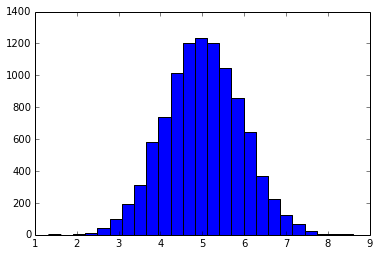

In [37]:
x = lanzamientos(10000,10)
plt.hist(x, bins = 25)
show()

In [41]:
data , cols = np.histogram(x, bins = 30)

In [42]:
col_cent = zeros(30)
for i in range(30):
    col_cent[i] = (cols[i+1] + cols[i])/2

In [43]:
data

array([   1,    0,    2,    3,   19,   38,   84,  124,  219,  339,  522,
        630,  830,  967, 1045, 1038,  969,  852,  728,  581,  416,  230,
        172,   90,   56,   31,    6,    5,    2,    1])

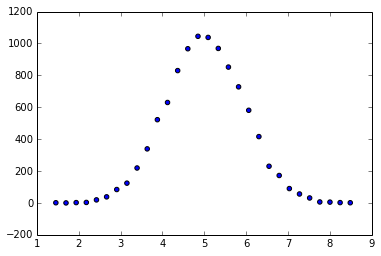

In [44]:
plt.scatter(col_cent,data)

In [45]:
from scipy.optimize import curve_fit

In [46]:
def gaussiana(x, ampl, x_0, sigma):
    return ampl*exp( -(x-x_0)**2/sigma )

In [54]:
popt, pcov = curve_fit(gaussiana, col_cent,data,p0=[1000.,5.,3.])
print popt, pcov

[ 1049.6575906      5.01503193     1.71003341] [[  4.95692630e+01  -2.59739201e-08  -1.07674262e-01]
 [ -2.59739201e-08   5.12896391e-05   1.90205940e-10]
 [ -1.07674262e-01   1.90205940e-10   7.01664469e-04]]


In [55]:
y_opt = gaussiana( col_cent, popt[0], popt[1],  popt[2])
scatter

<function matplotlib.pyplot.scatter>

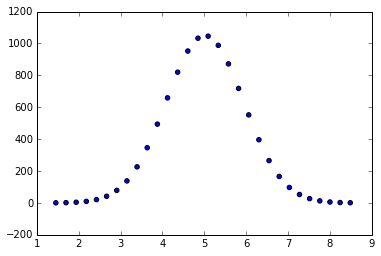

In [56]:
plt.scatter(col_cent,y_opt)